# **Actividad - Taller 5**

## **Clasificación**

### K - Nearest Neighbors

El algoritmo de los K vecinos más cercanos para la clasificación utiliza lo que se conoce como voto de mayoría, por el cuál analiza los k vecinos más cercanos a un conjunto de datos a estudiar (la cercanía puede definirse de distintas maneras, como una distancia euclidiana por ejemplo) y le asigna la clase más común entre dichos k vecinos; es decir, si en mi problema solo existen las clases 1 y 2, y para el conjunto de estudio escojo cinco vecinos, en ellos podrá haber tres perteneciente a la clase 1 y dos perteneciente a la clase 2, en este caso, el algoritmo clasificaría al conjunto de estudio en la clase 1.

### Logistic Regression

La regreción logística es un método de clasificación usado mayoritariamente en problemas de clasificación binaria (para predecir si algo es verdadero o falso, 1 o 0, )La regresión logística es un método de clasificación usado mayoritariamente en problemas de clasificación binaria (para predecir si algo es verdadero o falso, 1 o 0, o para decidir entre dos clases). Lo anterior lo realiza al "entrenar" una curva logística, que es una función en forma de S la cual indica la probabilidad de que un punto de estudio pertenezca a una de las clases (teniendo en cuenta que la función logística toma valores entre 0 y 1). La función se entrena usando la métrica denominada "Maximum Likelihood"

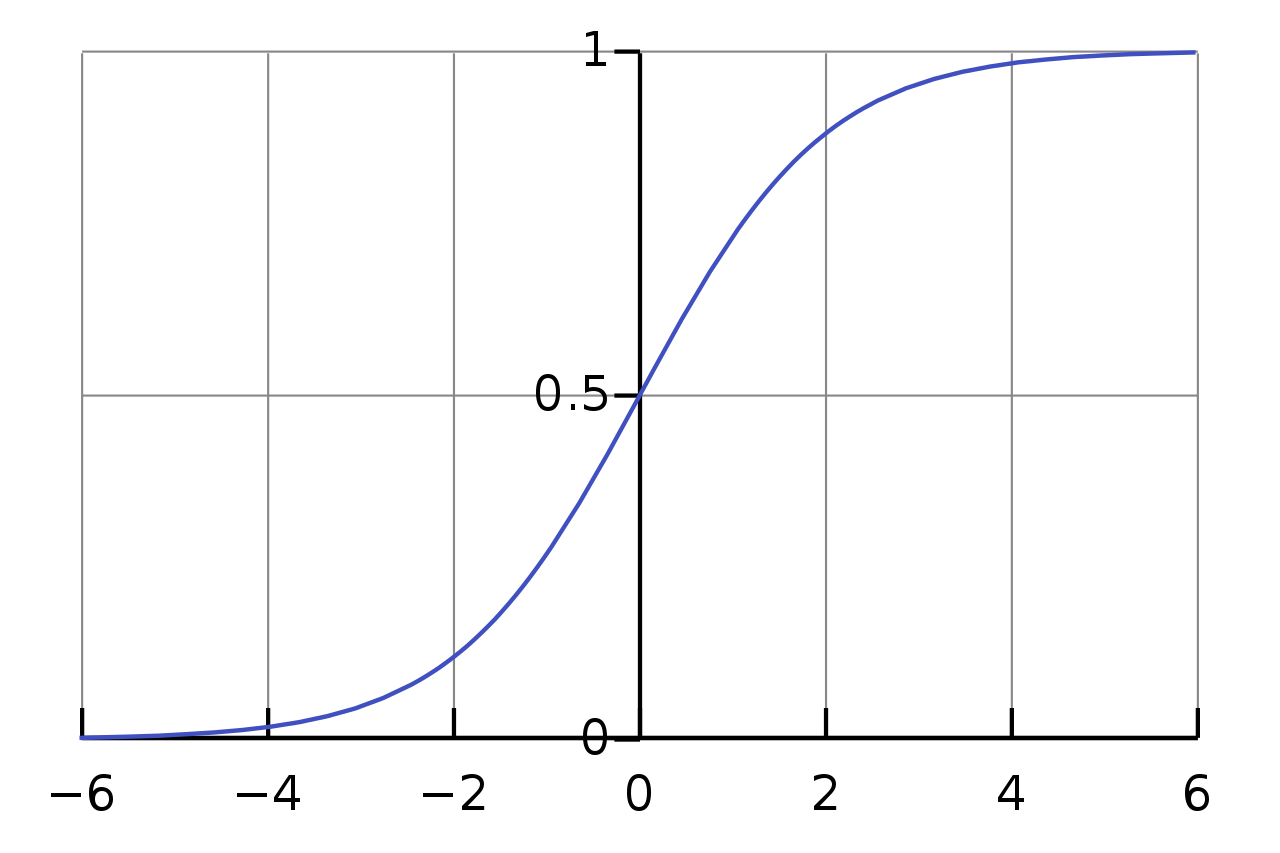

## **Regresión**

### Regresión Lineal

La regresión lineal es un algoritmo iterativo que se encarga de ajustar la mejor línea recta a una distribución de puntos en el plano que puede representar, por ejemplo, altura vs peso; esto con el fin de realizar predicciones futuras utilizando la recta ajustada. El ajuste de la recta lo realiza mediante el método de mínimos cuadrados, el cual minimiza iterativamente la suma de los cuadrados de las distancias de los puntos a la recta (cuya pendiente e intercepto cambian en cada iteración)

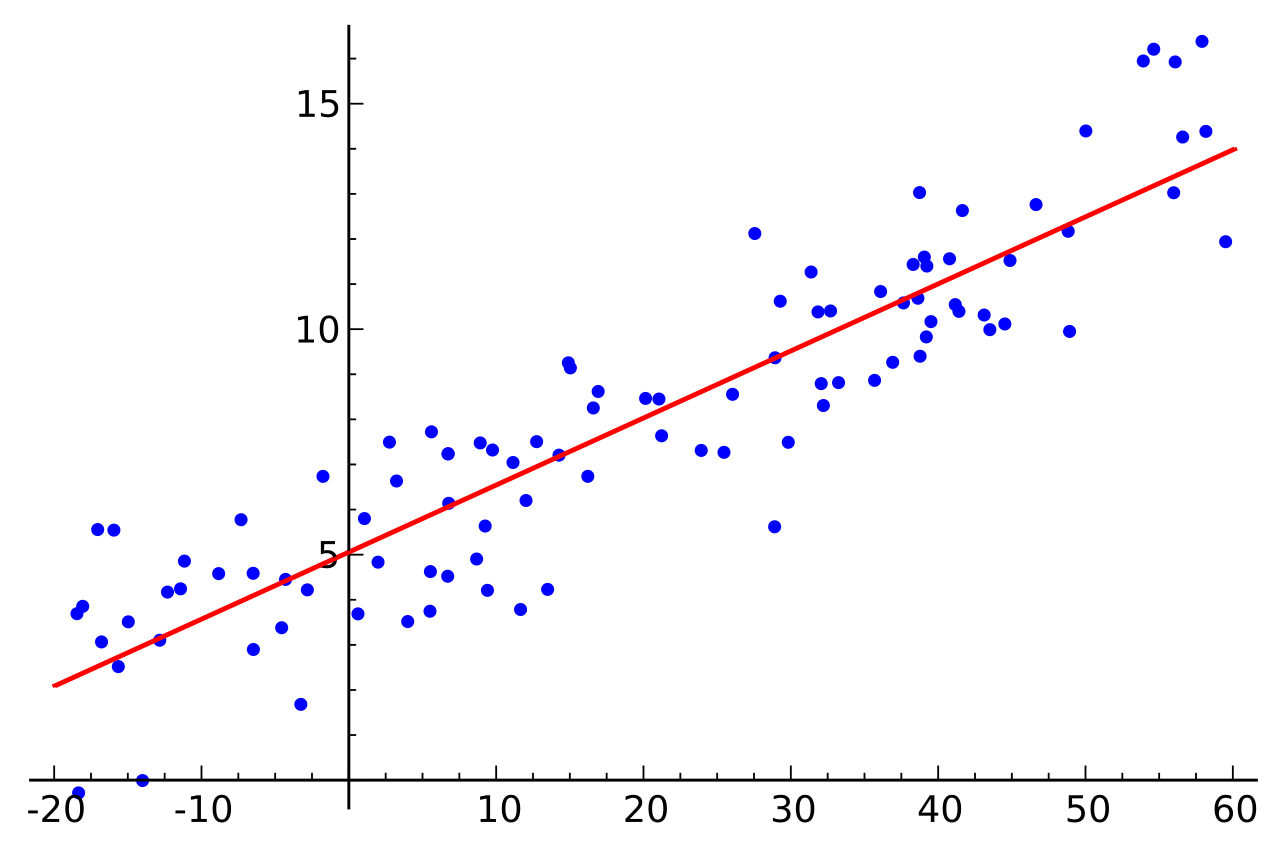

### Regresión Polinomial

Es un método que funciona esencialmente igual a la regresión lineal, pero en este caso se ajustan los diferentes coeficientes de un polinomio, con la ventaja de que se pueden ajustar polinomios de distintos grados... El algoritmo hace uso nuevamente del método de mínimos cuadrados para ajustar el polinomio

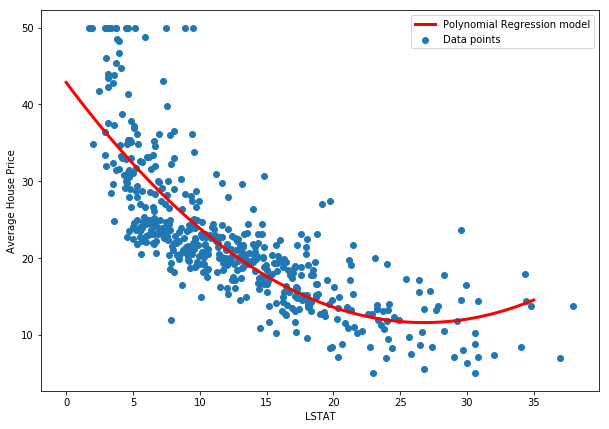

## **Clustering**

### K-Means

El algoritmo de K-means toma un conjunto de datos y los agrupa en un número K de clústers mediante un proceso iterativo. Este proceso consta en lo siguiente: inicialmente se asigna aleatoriamente cada dato a un clúster específico, paso seguido se calcula el centroide de cada uno de los clúster según los datos que tenga, luego se vuelve a asignar cada dato al clúster más cercano, teniendo en cuanta que cada centroide representa un clúster, y se repiten los últimos dos pasos hasta que los centroides lleguen a un punto de equilibrio o hasta que se alcance un número máximo de iteraciones. La cercanía de un punto al centroide puede calcularse mediante la distancia euclidiana, entre otras.

### Clustering Jerárquico

En este método se construyen iterativamente clústers anidados los cuales se van combinando sucesivamente. Inicialmente, se considera cada dato individual como un clúster, en el primer paso del algoritmo se calcula la distancia entre todos los clústers (sea la euclidiana u otra)  y aquellos clústers más cercanos se combinan en un clúster más grande; este proceso se repite máximo hasta obtener un clúster de todos los datos, o dependiendo de la altura escogida en la representación de dendograma del problema

## **Reducción de Dimensionalidad**

### PCA

En este método se pretende convertir un conjunto de datos inicial, de alta dimensionalidad, en un conjunt nuevo de variables independientes de dimensionalidad reducida. Las nuevas variables serán combinaciones lineales de las variables iniciales y se construyen según el orden de correlación o variabilidad en los datos iniciales. De esta manera, si se grafica la representación de los datos en las nuevas variables, estarán cercanos los datos más correlacionados entre sí, formándose normalmente clústers definidos

### Non-negative Matrix Factorization

Este algoritmo aprovecha propiedades del algebre lineal para reducir la dimensionalidad de un conjunto de datos, minimizando la perdida de información importante. Esto lo hace al factorizar una matriz como la multiplicación de dos matrices con una dimensión menor a la original. Una propiedad importante del método es que los datos deben ser todos no negativos.

## Tratamientos de los datasets

En general se desea que los datasets posean datos numéricos, a nivel de preprocesamientos es preferible hacer una mezcla de los conjuntos de datos para evitar sesgos en el momento de entrenar el método. Igualmente, un análisis previo de los datos puede ser útil para remover puntos que tengan valores atípicos, en especial al trabajar con métodos que son sensibles a los pequeños cambios en el data set, como el caso de los métodos de regresión. En algunos casos de los métodos de reducción de dimensionalidad es conveniente hacer una normalización de los datos y, específicamente, el método de Non-negative Matrix Factorization necesita datos con valores no negativos, tal como su nombre lo indica

# Clustering Aglomerativo

Se importan las librerías necesarias


In [2]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
from tabulate import tabulate 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin_min

Se importa el dataset de las flores

In [3]:
from google.colab import files
import io

uploaded = files.upload()
iris_df = pd.read_csv(io.BytesIO(uploaded["iris.csv"]))

iris_df.head()

Saving iris.csv to iris.csv


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Se cambia la columna "class", donde están los nombres, por datos de tipo entero

In [4]:
label_encoding = preprocessing.LabelEncoder()
iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Se mezcla el dataset aleatoriamente para quitar el orden en los datos

In [5]:
iris_df = iris_df.sample(frac=1).reset_index(drop=True)
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,7.7,3.8,6.7,2.2,2
1,7.2,3.0,5.8,1.6,2
2,5.8,2.8,5.1,2.4,2
3,6.7,3.3,5.7,2.1,2
4,5.6,2.8,4.9,2.0,2


Se toman las características de las flores que se usarán para entrenar el método

In [6]:
iris_features = iris_df.drop('class', axis=1)
iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,7.7,3.8,6.7,2.2
1,7.2,3.0,5.8,1.6
2,5.8,2.8,5.1,2.4
3,6.7,3.3,5.7,2.1
4,5.6,2.8,4.9,2.0


Se entrena el método de Agglomerative Clustering usando 3 clústers

In [30]:
Agglomerative_model=AgglomerativeClustering(n_clusters=3).fit(iris_features)

In [31]:
Agglomerative_model.labels_

array([2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0,
       1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0,
       2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2])

Se asignan los clusters del método aglomerativo a los datos

In [32]:
iris_features['cluster'] = Agglomerative_model.labels_

Se grafica la "sepal-length" vs "petal-length" para ver la agrupación de los datos definida por el método aglomerativo, cada color corresponde a un clúster diferente. Se usan dichas variables específicas para comparar con las gráficas realizadas en clase

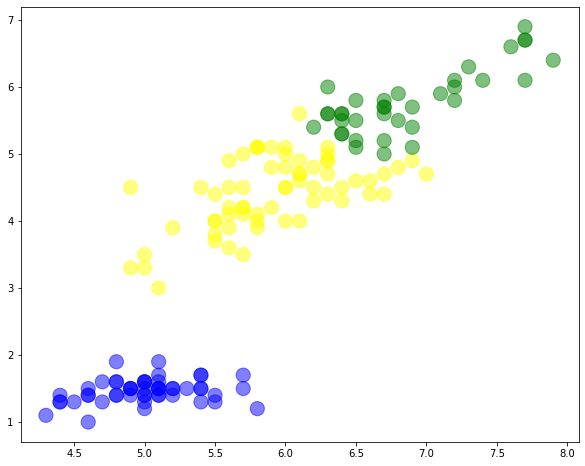

In [33]:
colors_original = ['yellow','blue','green']

plt.figure(figsize=(10, 8))

plt.scatter(iris_features['sepal-length'], iris_features['petal-length'], c=iris_features['cluster'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors_original), alpha=0.5)

El resultado de K_means se muestra en la siguiente figura, se observa que los resultados son bastante similares, con diferencias en algunos pocos puntos situados en los límites entre los clústers. Se puede notar que en el método aglomerativo, los límites entre los clústers están más claramente definidos, esto se debe a que en el aglomerativo, un punto se le asigna el clúster más cercano mientras que en k-means al centroide más cercano.

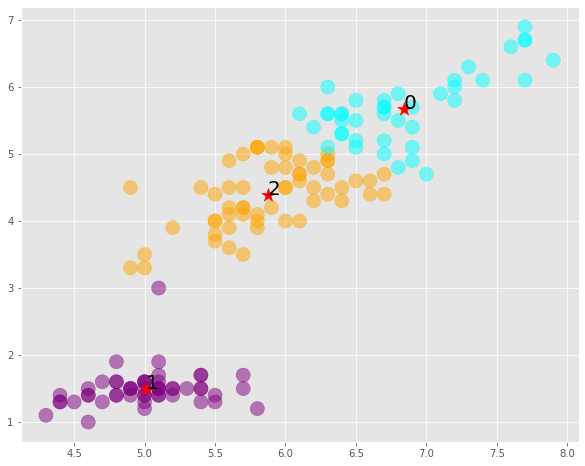

A continuación se realiza el dendograma para este problema, y se puede observar la separación de los datos en 3 sectores aceptablemente espaciados, por lo que se justifica la utilización de 3 clusters en el algoritmo

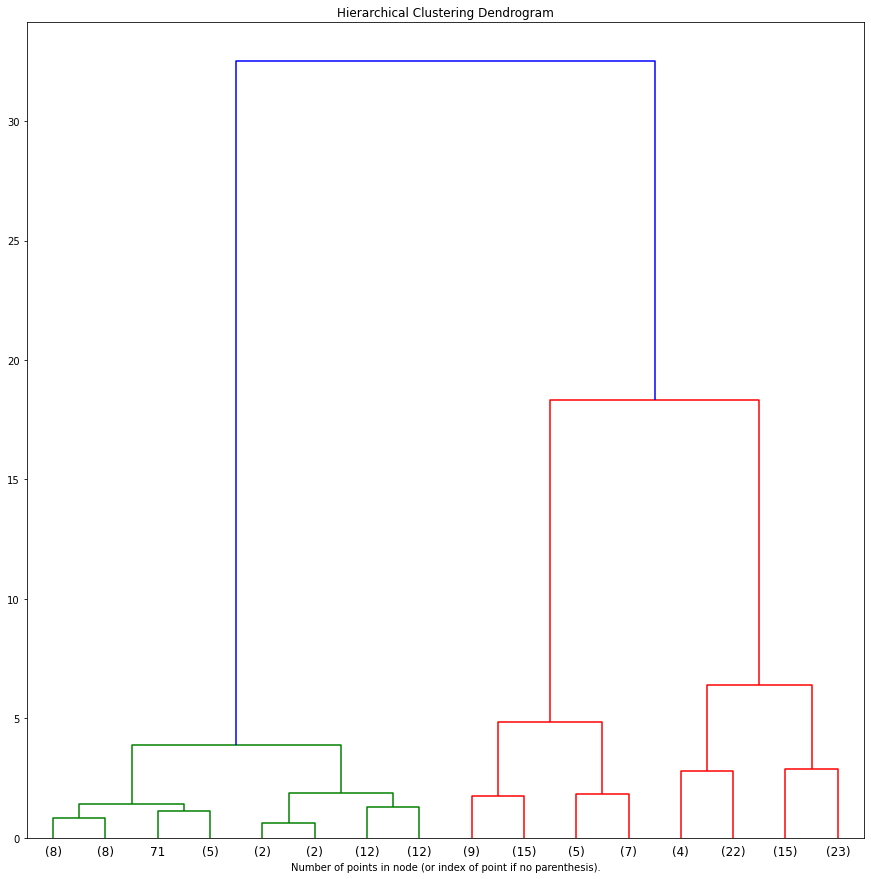

In [34]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(iris_features)
plt.figure(figsize=(15, 15))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Predicción

In [54]:
iris_features = iris_df.drop('class', axis=1)
iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,7.7,3.8,6.7,2.2
1,7.2,3.0,5.8,1.6
2,5.8,2.8,5.1,2.4
3,6.7,3.3,5.7,2.1
4,5.6,2.8,4.9,2.0


In [55]:
kmeans_model = KMeans(n_clusters=3).fit(iris_features)

In [56]:
X_new = np.array([[6.22,4.3,1.4,0.4]]) #nueva observación
 
new_labels = kmeans_model.predict(X_new)
print(new_labels)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Esta flor pertenece al cluster numero 0 definido por K-means, o, como el numero puede cambiar para diferentes entrenadas del método, pertenece al cluster con las siguientes características promedio:

In [57]:
iris_features['cluster'] = kmeans_model.labels_
cluster_1 = iris_features[iris_features['cluster'] == new_labels[0]]
cluster_1.drop('cluster', axis=1).describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000
